In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Algorithm

In [76]:
def one_step_survival(r, sigma, S0, q, barrier, dt, n_simulations, m_observations, notional):
    p_table, l_table = np.zeros(n_simulations), np.ones(n_simulations)
    s = S0*np.ones(n_simulations)
    tj = dt
    coupon = q*np.ones(n_simulations)
    for _ in range(m_observations):
        d = (np.log(barrier/s) - (r - sigma**2/2)*dt)/(sigma*np.sqrt(dt))
        p = norm.cdf(d)
        p_table += (1 - p)*l_table*np.exp(-r*tj)*notional*(1 + coupon)
        l_table *= p
        u = np.random.uniform(0, 1, size=(n_simulations,))
        s *= np.exp((r - sigma**2/2)*dt + sigma*np.sqrt(dt)*norm.ppf(p*u))
        tj += dt
        coupon += q
    assert np.max(s) <= barrier
    payoff_at_expiry = notional*s/barrier
    p_table += l_table*np.exp(-r*m_observations*dt)*payoff_at_expiry
    return p_table      


In [77]:
one_step_survival(.03, .4, 100, .05, 100, .25, 10**5, 4, 100).mean()

93.8705226294665

## Delta

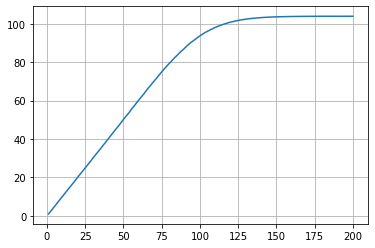

In [78]:
spots = np.linspace(1, 200, 100)
prices = []
for s in spots:
    sim = one_step_survival(
        r=.04, sigma=.4, S0=s, q=.05, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    prices.append(sim.mean())
prices = np.array(prices)
fig, ax = plt.subplots()
ax.plot(spots, prices)
ax.grid();

In [79]:
spots = np.linspace(4, 200, 100)
diff = []
for s in spots:
    sim1 = one_step_survival(
        r=.03, sigma=.4, S0=s-3, q=.05, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    sim2 = one_step_survival(
        r=.03, sigma=.4, S0=s+3, q=.05, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    diff.append((sim2.mean() - sim1.mean())/6)
diff = np.array(diff)

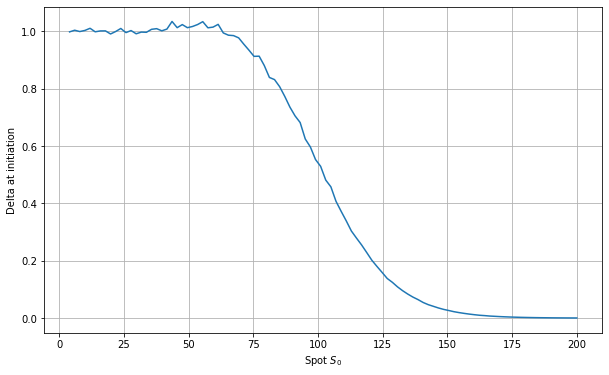

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(spots, diff)
ax.set_xlabel(r'Spot $S_0$')
ax.set_ylabel(r'Delta at initiation')
ax.grid();

In [87]:
# fig.savefig('delta.png', dpi=300)

## Vega

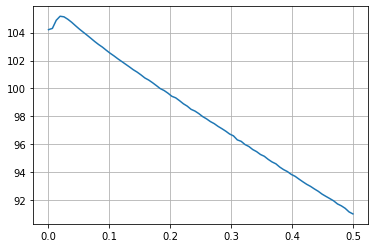

In [51]:
vols = np.linspace(.001, .5, 80)
prices = []
for v in vols:
    sim = one_step_survival(
        r=.03, sigma=v, S0=100, q=.05, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    prices.append(sim.mean())
prices = np.array(prices)
fig, ax = plt.subplots()
ax.plot(vols, prices)
ax.grid();

In [88]:
vols = np.linspace(.001, .3, 100)
diff = []
for v in vols:
    sim1 = one_step_survival(
        r=.03, sigma=v, S0=100, q=.05, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    sim2 = one_step_survival(
        r=.03, sigma=v + .02, S0=100, q=.05, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    diff.append((sim2.mean() - sim1.mean())/.02)
diff = np.array(diff)

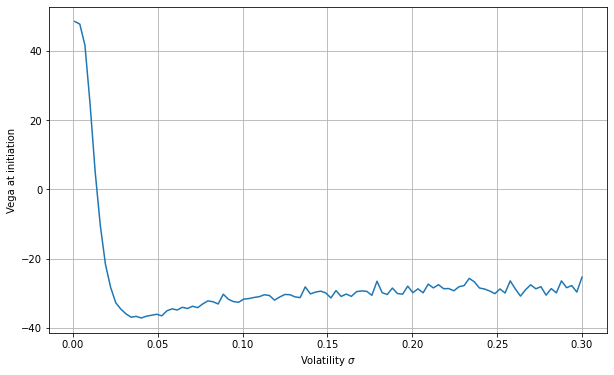

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(vols, diff)
ax.set_xlabel(r'Volatility $\sigma$')
ax.set_ylabel(r'Vega at initiation')
ax.grid();

In [90]:
# fig.savefig('vega.png', dpi=300)

In [69]:
# vols = np.linspace(.005, .5, 80)
# prices1 = []
# prices2 = []
# for v in vols:
#     sim1 = one_step_survival(
#         r=.03, sigma=v, S0=100, q=.1, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
#     )
#     sim2 = one_step_survival(
#         r=.03, sigma=v + .02, S0=100, q=.1, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
#     )
#     prices1.append(sim1.mean())
#     prices2.append(sim2.mean())
# prices1 = np.array(prices1)
# prices2 = np.array(prices2)
# plt.plot(vols, prices1)
# plt.plot(vols, prices2)

## Sensitivity with respect to the risk-free rate

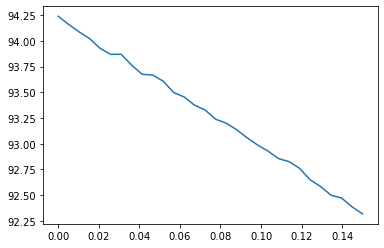

In [70]:
rates = np.linspace(0, .15, 30)
prices = []
for rate in rates:
    sim = one_step_survival(
        r=rate, sigma=.4, S0=100, q=.05, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    prices.append(sim.mean())
prices = np.array(prices)
plt.plot(rates, prices)